In [1]:
import requests
import csv

# Send the GET request to the API
response = requests.get("https://ssd-api.jpl.nasa.gov/sbdb_query.api?fields=full_name,e,a,i,om,w,ma&sb-class=TNO")

# Check the status code of the response
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Open a CSV file for writing
    with open("21_obs_data.csv", "w", newline="") as csv_file:
        # Create a CSV writer
        writer = csv.writer(csv_file)
        
        # Write the header row
        writer.writerow(["name","e", "a", "i", "Om", "om", "M"])
        
        # Iterate over the objects in the data
        for obj in data['data']:
            # Extract the relevant information for each object
            name  = obj[0]
            e     = obj[1]
            a     = obj[2]
            i     = obj[3]
            Om    = obj[4]
            w     = obj[5]
            M     = obj[6]
            
            # Write the information to the CSV file
            if 38<float(a)<40.5:
                writer.writerow([name,e,a,i,Om,w,M])
else:
    print("Error: Could not retrieve data from the API")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

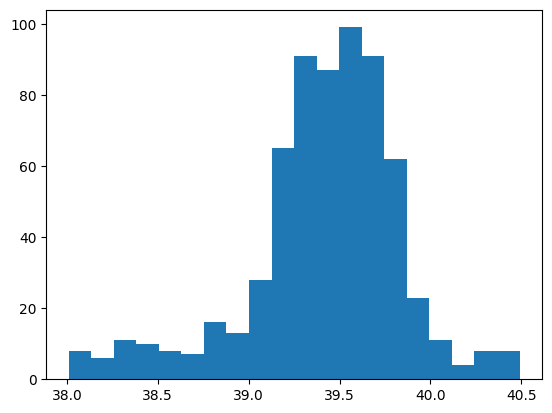

In [3]:
awa = pd.read_csv('21_obs_data.csv')
plt.hist(awa['a'],bins=20);


In [4]:
len(awa)

656

225

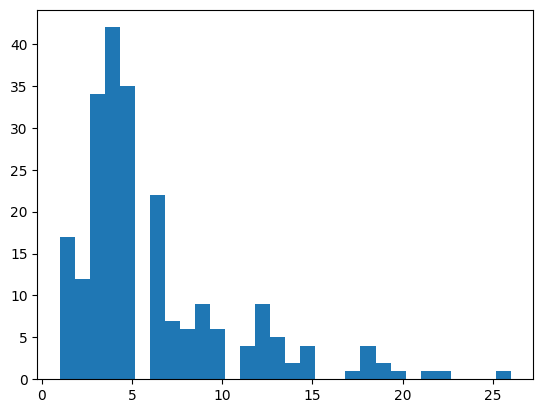

In [6]:
import json
import matplotlib.pyplot as plt
file = open('../distant_extended.json')
data = json.load(file)
#a:39-40, 47-49
data = [dat for dat in data if dat['Num_opps']>0 and 47<dat['a']<49]
plt.hist([data[i]['Num_opps'] for i in range(len(data))],bins=30);
len(data)

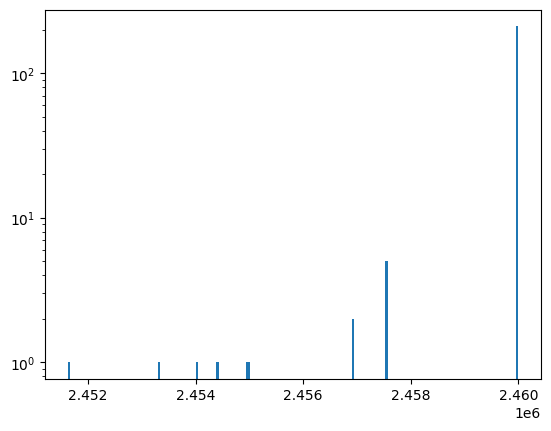

In [19]:
plt.hist([data[i]['Epoch'] for i in range(len(data))],bins=200);
plt.yscale('log')

In [18]:
output = []
for x in [data[i]['Epoch'] for i in range(len(data))]:
    if x not in output:
        output.append(x)
print(output)

[2460000.5, 2451620.5, 2453320.5, 2454020.5, 2454400.5, 2454960.5, 2454980.5, 2456940.5, 2457540.5]
